In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,3)
plt.rcParams['font.family'] = 'sans-serif'

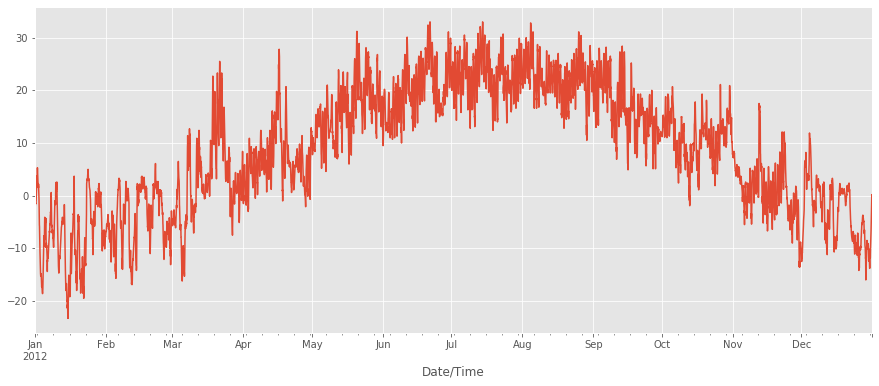

In [44]:
#reading and ploting the adta frame

weather_mar2012 = pd.read_csv('data/weather_2012.csv',  
                              parse_dates = ['Date/Time'],
                              index_col='Date/Time',
                             dayfirst = True)
weather_mar2012['Temp (C)'].plot(figsize=(15, 6))

In [45]:
weather_mar2012.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [46]:
weather_mar2012.dtypes

Temp (C)              float64
Dew Point Temp (C)    float64
Rel Hum (%)             int64
Wind Spd (km/h)         int64
Visibility (km)       float64
Stn Press (kPa)       float64
Weather                object
dtype: object

### This dataset cannot be accessed using "." operator as because there are spaces in column name. lets clean spaces

In [47]:
#writting a list comprehension for columns

new_cols= [i.replace(" ","_").replace("(","").replace(")","") 
           for i in weather_mar2012.columns]

In [48]:
weather_mar2012.columns = new_cols

In [49]:
weather_mar2012.head()

,Temp_C,Dew_Point_Temp_C,Rel_Hum_%,Wind_Spd_km/h,Visibility_km,Stn_Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [50]:
weather_mar2012.Temp_C

Date/Time
2012-01-01 00:00:00   -1.8
2012-01-01 01:00:00   -1.8
2012-01-01 02:00:00   -1.8
2012-01-01 03:00:00   -1.5
2012-01-01 04:00:00   -1.5
                      ... 
2012-12-31 19:00:00    0.1
2012-12-31 20:00:00    0.2
2012-12-31 21:00:00   -0.5
2012-12-31 22:00:00   -0.2
2012-12-31 23:00:00    0.0
Name: Temp_C, Length: 8784, dtype: float64

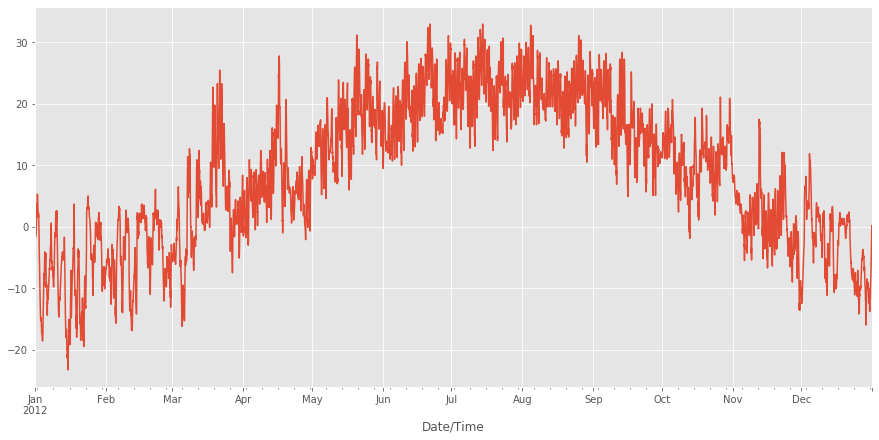

In [51]:
weather_mar2012.Temp_C.plot(figsize=(15,7))

### Lets clean the dataset properly

1. __Remove the values which are entirely empty:__

The argument axis=1 to dropna means "drop columns", not rows", and how='any' means "drop the column if any value is null".

In [52]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012.head()

,Temp_C,Dew_Point_Temp_C,Rel_Hum_%,Wind_Spd_km/h,Visibility_km,Stn_Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### Lets play with the date column: the dtype is float64, need to change that

In [60]:
temperatures = weather_mar2012[['Temp_C']].copy()

In [61]:
temperatures.head()

,Temp_C
Date/Time,
2012-01-01 00:00:00,-1.8
2012-01-01 01:00:00,-1.8
2012-01-01 02:00:00,-1.8
2012-01-01 03:00:00,-1.5
2012-01-01 04:00:00,-1.5


In [62]:
temperatures['Hour'] = weather_mar2012.index.hour

In [63]:
temperatures.head()

,Temp_C,Hour
Date/Time,,
2012-01-01 00:00:00,-1.8,0
2012-01-01 01:00:00,-1.8,1
2012-01-01 02:00:00,-1.8,2
2012-01-01 03:00:00,-1.5,3
2012-01-01 04:00:00,-1.5,4


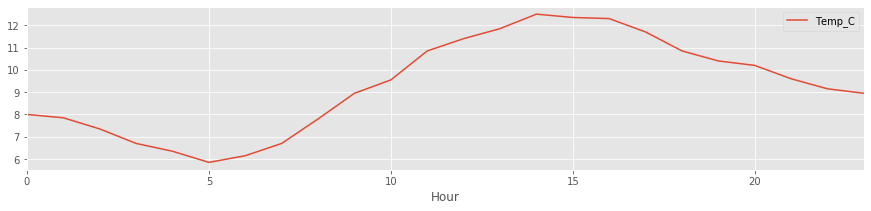

In [64]:
temperatures.groupby('Hour').aggregate(np.median).plot()

### Getting the whole year of data

In [65]:
def download_weather_month(year, month):
    if month == 1:
        year +=1
    url = url_template.format(year = year, month = month)
    weather_data = pd.read_csv(url, skiprows = 15, 
                               index_col = 'Data/Time', parse_dates = True, 
                               header = True)
    weather_data = weather_data.drop(axis = 1)
    weather_data.columns = [col.replace('\xb0','') 
                            for col in weather_data.columns]
    weather_data = weather_data.drop(['Year','Day', 'Month', 'Time','Data Quality'], axis = 1)
    return weather_data

In [68]:
# download_weather_month(2012, 1)[:5]
# data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]
# weather_2012 = pd.concat(data_by_month)
# weather_2012
# weather_2012.to_csv('../data/weather_2012.csv')

NameError: name 'url_template' is not defined